In [1]:
# Imports
import numpy as np
import math
import matplotlib.pyplot as plt

np.random.seed(1)

### Q.1 (70pts) Define functions

In [2]:
# One hot encode the labels
def one_hot_encode(y):
    targets = np.array(np.unique(y)).reshape(-1)
    enc = np.eye(len(targets))[y]
    print(enc)
    return enc

# Get the loss of for the training example
def cross_entropy(Y, Yhat):
    m= Y.shape[1]
    loss = np.multiply(np.log(Yhat),Y) + np.multiply((1.-Y), np.log(1. - Yhat))
    loss = np.sum(loss)
    cost = -1./m * np.sum(loss)
    cost = np.squeeze(cost)
    return cost

# Applying Sigmoid Activation function to the hidden layer outputs used while forward propagation
# Purpose of this method is to do squishing on the linear function
def sigmoid(z):
    return 1./(1+np.exp(-z))

# Applying Sigmoid Activation function to the hidden layer outputs used while backward propagation to get gradients
# Purpose of this method is to do undo the squishing on the linear function
def sigmoid_prime(z):
    inv = (np.exp(-z))/(np.power((1+np.exp(-z)),2))
    return inv

def relu(z):
    return np.maximum(z,0)
    
def relu_prime(z):
    return np.where(z < 0, 0.0, 1.0)

# Softmax activation function to get the probablity of the classes
def softmax(z):
    softMax = (np.exp(z) / np.sum(np.exp(z),axis=0))
    softMax = np.matrix(np.argmax(softMax,axis=0)).T
    return softMax

def zero_pad(X, pad, pad_value):
    ## Pads the height and width and breadth only by 'pad' columns using constant value, 4 dimensional padding
    padded_array = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = (pad_value,pad_value))
    print("Dimension after padding" + str(padded_array.shape))
    return padded_array

# Convolution of a slice
def convolute_slice(a_slice, W, b):
    conv = np.multiply(a_slice, W)
    z = np.sum(conv) + float(b)
    return z

def convolute_forward(A_prev, W, b, hyper_params):
    # Get the required parameters
    m, nH_prev, nW_prev, nC_prev = A_prev.shape
    f, f, nC_prev, n_C  = W.shape
    pad = hyper_params["pad"]
    stride = hyper_params["stride"]
    
    # Calculate the dimensions of input
    nH = math.floor((nH_prev -f + 2 * pad)/stride) + 1
    nW = math.floor((nW_prev -f + 2 * pad)/stride) + 1
    
    # Calculate the dimensions of output
    Z = np.zeros(m, nH, nW, nC)
    A_prev_pad = zero_pad(A_prev, pad)
    
    # referring professor's code for forward propagation
    for i in range(m):
        a_pad_prev = A_prev_pad[i, :, :, :]
        for h in range(nH):
            for w in range(nW):
                for c in range(nC):
                    # Find the coordinates of the current slice
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Extract the slice from input
                    a_slice_prev = a_pad_prev[vert_start:vert_end, horiz_start:hotiz_end, :]

                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron
                    Z[i, h, w, c] = convolute_slice(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
                    
    cache = (A_prev, W, b, hyper_params)
    return Z, cache

def pool_forward(A_prev, stride, pad, pooling_method):
    # Get the required parameters
    (m, nH_prev, nW_prev, nC_prev) = A_prev.shape
    (f, f, nC_prev, n_C) = W.shape
    f = hyper_params["f"]
    stride = hyper_params["stride"]
    
    # Calculate the dimensions of the output
    nH = int(1 + (nH_prev - f) / stride)
    nW = int(1 + (nW_prev - f) / stride)
    nC = nC_prev
    
    # Initialize the output matrix
    A = np.zeros((m, nH, nW, nC))
    
     for i in range(m):
        for h in range(nH):
            for w in range(nW):
                for c in range(nC):
                    
                    # Find the coordinates of the current slice
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                     # Extract the slice from input
                    a_slice_prev = a_pad_prev[i, vert_start:vert_end, horiz_start:hotiz_end, c]
                    
                    # Perform the pooling on the slice
                    if(pooling_method == "max"):
                        A[i, h, w, c] = np.max(a_slice_prev)
                    elif(pooling_method == "avg"):
                        A[i, h, w, c] = np.mean(a_slice_prev)
    cache = (A_prev, hyper_params)                
    assert(A.shape == (m, nH, nW, nC))
             
             
def convolute_backward(dZ, cache):
    (A_prev, W, b, hyper_params) = cache
    # Get the input dimensions
    (m, nH_prev, nW_prev, nC_prev) = A_prev.shape
    
    (f, f, n_C_prev, n_C) = W.shape
    stride = hyper_params["stride"]
    pad = hyper_params["pad"]
    (m, nH, nW, nC) = dZ.shape
    dA_prev = np.zeros((m, nH_prev, nW_prev, nC_prev))                           
    dW = np.zeros((f, f, nC_prev, nC))
    db = np.zeros((1, 1, 1, n_C))
    A_pad_prev = zero_pad(A_prev, pad)
    dA_pad_prev = zero_pad(dA_prev, pad)
    
    for h in range(nH):
        for w in range(nW):
            for c in range(nC):
                    
                # Find the coordinates of the current slice
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                # Extract the slice from input
                a_slice = a_pad_prev[i, vert_start:vert_end, horiz_start:hotiz_end, c]
                
                da_pad_prev[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                db[:,:,:,c] += dZ[i, h, w, c]
    
    dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    return dA_prev, dW, db

### Q.2 Load data

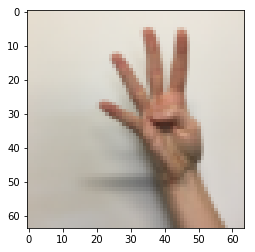

Digit in the image is 4
(1020, 64, 64, 3)
[[ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 ..., 
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


TypeError: cannot concatenate 'str' and 'tuple' objects

In [4]:
X_train = np.load('ex5_train_x.npy')
y_train = np.load('ex5_train_y.npy')
indx = 2
plt.imshow(X_train[indx])
plt.show()
print("Digit in the image is " + str(y_train[indx]))
print(X_train.shape)

# Testing
y_train_encoded = one_hot_encode(y_train)
X_train_padded = pad(X_train, 2, 0)

### Q.3 (10pts) Initialize parameters (Weights, bias for each layer)